# Load Package

In [1]:
%load_ext autoreload
%autoreload 2

import sys
from os.path import join
from tqdm.auto import tqdm
import joblib
import torch
sys.path.append("../../")

from src.file_manager.load_data import load_split_dict
from src.file_processing.processing_predictions import load_pi_df_dict
from src.evaluation.perf_eval import get_prediction_performance_table, display_pred_perf
from src.evaluation.ue_eval import get_ue_performance_table, display_ue_perf, restructure_ue_df
from src.evaluation.pi_eval import get_pi_performance_table, display_pi_perf
from src.evaluation.pi_plots import plot_predictions_with_pi_across_methods
from src.misc import create_folder
from ue_pi_dicts import ue_dict, pi_dict, pi_order
from seed_file import seed

# seed = 2023
data_label = "mimic"
batch_size = 64

# File paths
fp_notebooks_folder = "../"
fp_project_folder = join(fp_notebooks_folder, "../")
fp_data_folder = join(fp_project_folder, "../", "data")
fp_output_data_folder = join(fp_data_folder, data_label)
fp_checkpoint_folder = join(fp_project_folder, "checkpoints")
fp_project_checkpoints = join(fp_checkpoint_folder, data_label)
fp_tuning = join(fp_project_checkpoints, "tuning")
fp_models = join(fp_project_checkpoints, "models")
fp_predictions = join(fp_project_checkpoints, "predictions")
fp_pi_predictions = join(fp_project_checkpoints, "pi_predictions")
fp_evaluation = join(fp_project_checkpoints, "model_evaluation")

# Seed filepaths
fp_cur_model_folder = join(fp_models, str(seed))
create_folder(fp_cur_model_folder)
fp_cur_predictions_folder = join(fp_predictions, str(seed))
create_folder(fp_cur_predictions_folder)
fp_cur_pi_predictions_folder = join(fp_pi_predictions, str(seed))
create_folder(fp_cur_pi_predictions_folder)
fp_cur_evaluation_folder = join(fp_evaluation, str(seed))
create_folder(fp_cur_evaluation_folder)

2025-05-29 10:54:18.458744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-29 10:54:18.479228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-29 10:54:18.485364: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 10:54:18.500313: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-29 10:54:19.114249: W tensorflow/compiler/tf2

# Load PI Prediction Dict

In [2]:
pi_df_dict = load_pi_df_dict(fp_cur_pi_predictions_folder)

  0%|          | 0/3 [00:00<?, ?it/s]

Loaded df_dict!


# Prediction Performance

In [3]:
pred_perf_df = get_prediction_performance_table(pi_df_dict, ue_dict)
display_pred_perf(pred_perf_df)
pred_perf_df.to_csv(join(fp_cur_evaluation_folder, "pred_perf.csv"))

,t+1,t+2,t+3
Model,,,
RUE,0.075384,0.103599,0.122365
MC Dropout,0.075915,0.104625,0.123331
GPR,0.071506,0.099349,0.117729
Infer-Noise,0.075384,0.103600,0.122367
BNN,0.077903,0.105932,0.125583
DER,0.076437,0.104266,0.121892


# UE Performance

In [4]:
ue_perf_df = get_ue_performance_table(pi_df_dict, ue_dict)
ue_perf_df = restructure_ue_df(ue_perf_df)
display_ue_perf(ue_perf_df)
ue_perf_df.to_csv(join(fp_cur_evaluation_folder, "ue_perf.csv"))

t+1


t+2


t+3


# PI Performance

In [5]:
pi_perf_df = get_pi_performance_table(pi_df_dict, pi_dict)
display_pi_perf(pi_perf_df)
pi_perf_df.to_csv(join(fp_cur_evaluation_folder, "pi_perf.csv"))

t+1:


t+2:


t+3:


# Plot PI

In [3]:
pi_df_dict["t+3"]["test_df"]

,ABPdias (mmHg)_mean Min0,RESP (bpm)_mean Min0,ABPmean (mmHg)_mean Min0,ABPsys (mmHg)_mean Min0,SpO2 (%)_mean Min0,HR (bpm)_mean Min0,ABPdias (mmHg)_std Min0,RESP (bpm)_std Min0,ABPmean (mmHg)_std Min0,ABPsys (mmHg)_std Min0,...,RESP (bpm)_mean PredMin3_der_uncertainty_conformal_lb_unscaled,RESP (bpm)_mean PredMin3_der_uncertainty_conformal_ub_unscaled,ABPmean (mmHg)_mean PredMin3_der_uncertainty_conformal_lb_unscaled,ABPmean (mmHg)_mean PredMin3_der_uncertainty_conformal_ub_unscaled,ABPsys (mmHg)_mean PredMin3_der_uncertainty_conformal_lb_unscaled,ABPsys (mmHg)_mean PredMin3_der_uncertainty_conformal_ub_unscaled,SpO2 (%)_mean PredMin3_der_uncertainty_conformal_lb_unscaled,SpO2 (%)_mean PredMin3_der_uncertainty_conformal_ub_unscaled,HR (bpm)_mean PredMin3_der_uncertainty_conformal_lb_unscaled,HR (bpm)_mean PredMin3_der_uncertainty_conformal_ub_unscaled
4481,1.025969,-0.374103,0.198280,-0.506848,0.907064,0.765585,0.000000,0.000000,0.000000,0.014164,...,3.838105,25.237537,72.219330,97.280880,88.512146,129.18726,96.911380,101.500565,93.153496,108.163860
4482,1.030489,-0.374103,0.201077,-0.502179,0.827522,0.787138,0.017055,0.000000,0.012297,0.010412,...,1.883240,27.340350,68.285310,98.098940,82.336100,130.72385,96.317635,101.777000,92.293820,110.150390
4483,0.989809,-0.374103,0.154452,-0.545758,0.878561,0.778321,0.107721,0.000000,0.098317,0.070006,...,3.560774,25.766825,71.027200,97.033410,87.479360,129.68765,96.762024,101.524185,94.108640,109.684800
4484,0.777368,-0.374103,-0.020858,-0.691624,0.855362,0.699948,0.032231,0.000000,0.015594,0.019909,...,3.889191,25.660725,71.537110,97.034440,87.884980,129.26735,96.783790,101.452780,94.836716,110.108080
4485,0.819178,-0.374103,0.015510,-0.651677,0.962080,0.875308,0.026259,0.000000,0.024951,0.017899,...,4.523803,24.767868,72.624910,96.333374,89.721040,128.20007,96.838230,101.179640,95.423325,109.623276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,-0.214776,0.168898,-0.486175,-0.783018,0.034094,-1.792312,0.102407,0.476827,0.088834,0.071730,...,3.668604,38.148438,60.432340,100.812760,79.916630,145.45440,90.606310,98.000640,47.626137,71.811584
102752,-0.109686,0.290796,-0.383600,-0.726729,-0.109744,-1.751167,0.042562,0.372922,0.032899,0.030906,...,10.033576,33.125973,68.397100,95.441340,95.613630,139.50665,90.850750,95.803010,51.179000,67.376870
102785,-0.410267,-0.750878,-0.486175,-0.530626,-0.725071,-1.703163,0.088701,0.379429,0.080697,0.075399,...,0.662780,26.718807,63.945440,94.460480,88.852260,138.37842,91.831345,97.419160,49.248220,67.524895
102786,-0.419307,0.197710,-0.499230,-0.537889,-0.573737,-1.679651,0.080408,0.612235,0.060477,0.051343,...,-1.932334,27.220058,61.841145,95.982440,85.687410,141.09900,91.172180,97.424010,48.168053,68.616630


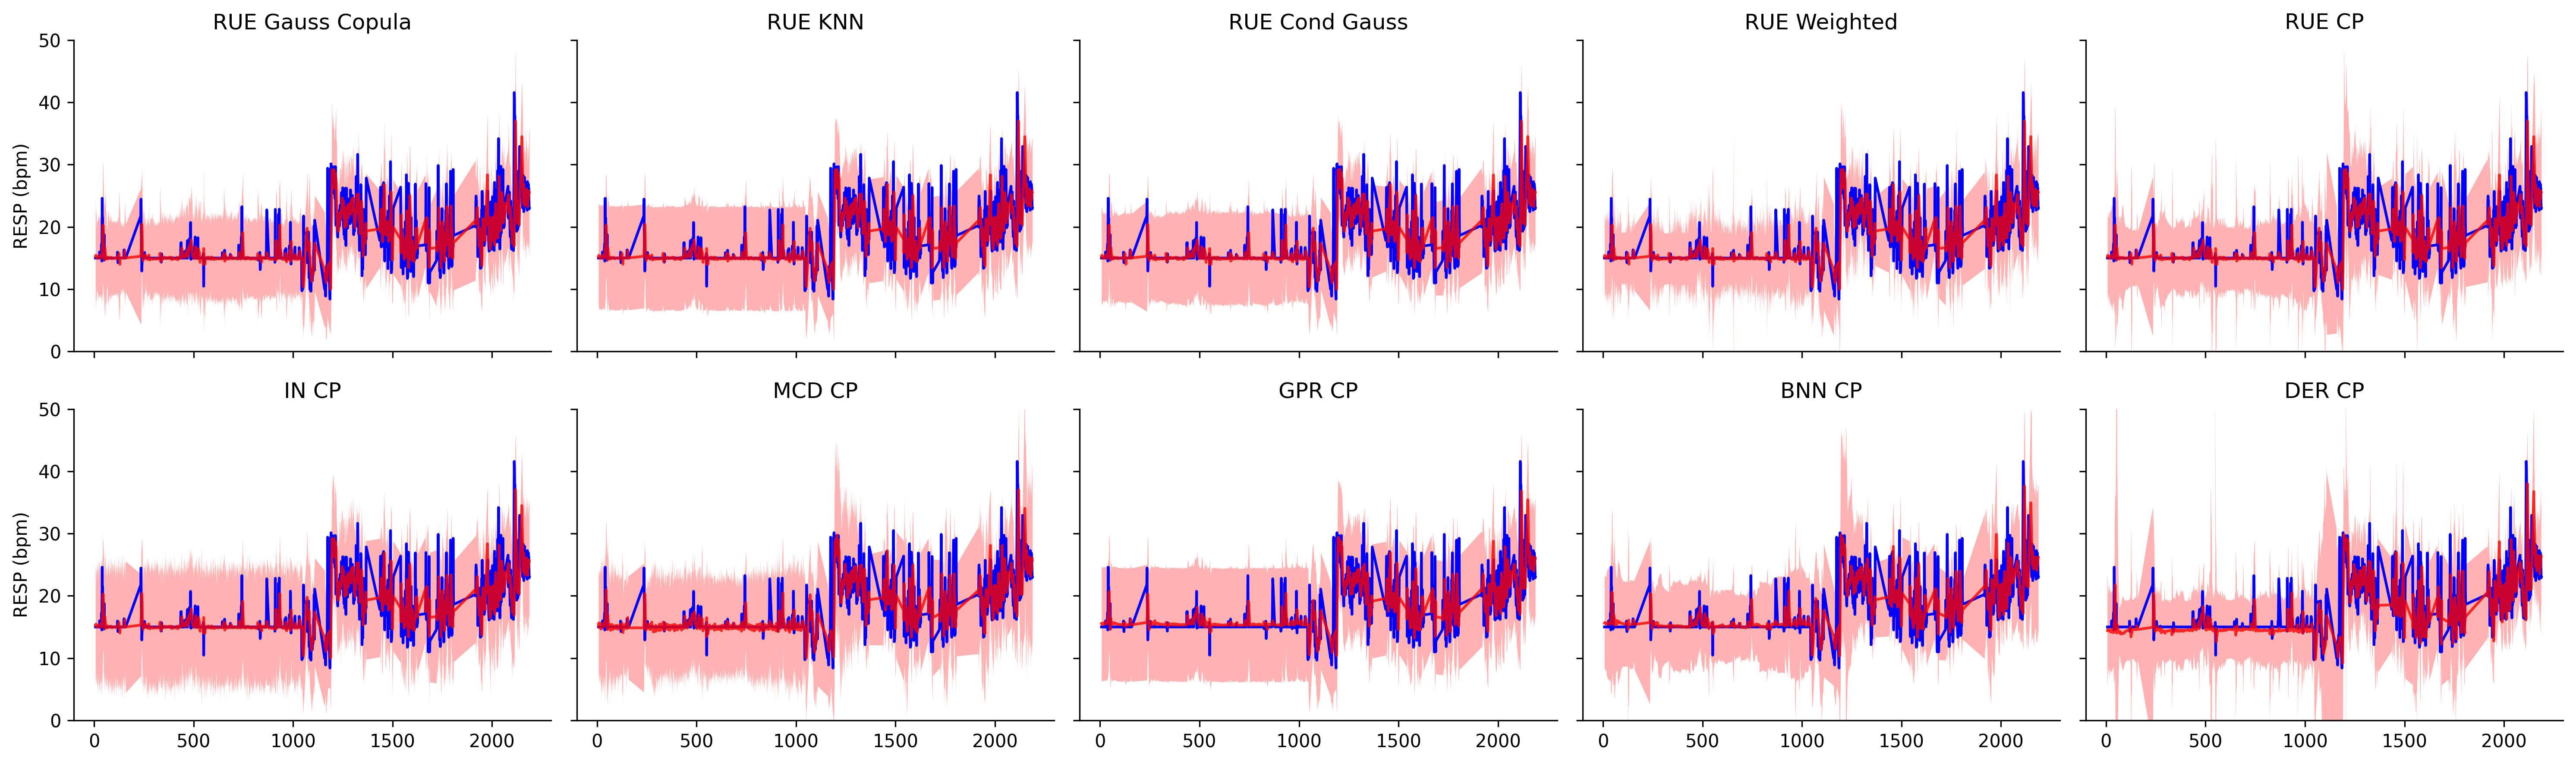

In [6]:
plot_predictions_with_pi_across_methods(
    pi_df_dict, pi_dict, record="055n", record_col="record", time_col="target_index",
    fp_cur_evaluation_folder=fp_cur_evaluation_folder, dpi=300, save_fig=True,
    display_feature="RESP (bpm)", regressor_label="t+3", pi_order=pi_order, ylim=[0, 50]
) # ABPsys (mmHg), RESP (bpm), # ylim=[0, 50]